<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lab-6:-Differential-equations" data-toc-modified-id="Lab-6:-Differential-equations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Lab 6: Differential equations</strong></a></span></li><li><span><a href="#Abstract" data-toc-modified-id="Abstract-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Abstract</strong></a></span></li><li><span><a href="#Set-up-environment" data-toc-modified-id="Set-up-environment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Set up environment</strong></a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Introduction</strong></a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Methods</strong></a></span><ul class="toc-item"><li><span><a href="#Implicit-Euler's-method-on-scalar-initial-value-problem" data-toc-modified-id="Implicit-Euler's-method-on-scalar-initial-value-problem-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Implicit Euler's method on scalar initial value problem</a></span></li><li><span><a href="#Explicit-Euler's-method-on-systems-of-initial-value-problems" data-toc-modified-id="Explicit-Euler's-method-on-systems-of-initial-value-problems-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Explicit Euler's method on systems of initial value problems</a></span></li><li><span><a href="#Simulation-of-a-stochastic-differential-equation" data-toc-modified-id="Simulation-of-a-stochastic-differential-equation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Simulation of a stochastic differential equation</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>Results</strong></a></span><ul class="toc-item"><li><span><a href="#Implicit-Euler's-method-on-scalar-initial-value-problem" data-toc-modified-id="Implicit-Euler's-method-on-scalar-initial-value-problem-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Implicit Euler's method on scalar initial value problem</a></span></li><li><span><a href="#Explicit-Euler's-method-on-systems-of-initial-value-problems" data-toc-modified-id="Explicit-Euler's-method-on-systems-of-initial-value-problems-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Explicit Euler's method on systems of initial value problems</a></span></li><li><span><a href="#Simulation-of-a-stochastic-differential-equation" data-toc-modified-id="Simulation-of-a-stochastic-differential-equation-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Simulation of a stochastic differential equation</a></span></li></ul></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><strong>Discussion</strong></a></span></li></ul></div>

<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/Volkaa/Lab-6/Volkaa_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Differential equations**
**Matthis Manthe**

# **Abstract**

In this lab, we implement and test different methods, such as the implicit Euler's method, to approximate solutions to differential equations. We cover in this lab a large variety of type of differential equation : ordinary differential equations (ODE), system of ODEs, and stochastic ODE. We test the accuracy of these methods, and also test stability of their solution against different models.

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [190]:
"""This program uses a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [70]:
# Load neccessary modules.
# from google.colab import files

import time
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

We implement in this lab the implicit Euler's method for scalar initial value problems and the explicit Euler's method and some ways of correcting it's solution (with the implicit method and the trapezoidal method) to assure stability for systems of differential equations. Finally, we simulate approximations of solutions of stochastic differential equations. We then test all these methods to assure their accuracy, as well as the stability of the found solution if they should be stable. All the methods and algorithms are taken from the seventh part of the course : [DD2363 course content.](https://kth.instructure.com/courses/17068/files/2640031?module_item_id=200126)

# **Methods**

## Implicit Euler's method on scalar initial value problem 

This is an implementation of the implicit Euler's method for scalar initial value problems of the type : $du/dt = f(u(t),t), u(0)=u_0$. Thus, we simply compute each $u_n$ by applying $u_n=u_{n-1}+T/k*f(u_n,t_n)$. We use the newton's method implementation done in lab 3 to compute each new approximation of the solution. 

The inputs are as follow :<br/>
function must have signature function(float u, float t), returning f(u(t),t),<br/>
u0 is the initial value,<br/>
k is the number of points approximation,<br/>
T is the final time, defining the interval [0,T] on which approximating the solution,<br/>
h is a coefficient used in the derivative approximation used in the newton's method,<br/>
and TOL is the precision desired of the fixed point found by the newton's method.

It returns the list of k+1 points approximated.

In [24]:
def derivative(function, x, h):
    f_a = function(x-h/2)
    f_b = function(x+h/2)
    return (f_b-f_a)/h

def newton_scalar(function, start, h, TOL):
    x = [start]
    while (np.abs(function(x[-1])) > TOL):
        df = derivative(function, x[-1], h)
        new_x = x[-1] - function(x[-1])/df
        x.append(new_x)
    return x

In [129]:
def implicit_scalar_euler(function, u0, k, T, h, TOL):
    t = 0
    result = [u0]
    for i in range(k):
        t += T/k
        def new_function(x):
            return x-result[-1]-T/k*function(x,t)
        u = newton_scalar(new_function, u0, h, TOL)[-1]
        result.append(u)
    return result

## Explicit Euler's method on systems of initial value problems

This is an implementation of explicit Euler's method for systems of initial value problems, analog to the scalar ones. Each new point $u_n$ is simply computed by $u_n = u_{n-1} +k*f(u_{n-1}, t_{n-1})$, but this time $f:R^m\times R \rightarrow R^m$, with m the number of equations in the system, such that $du/dt = f(u(t),t), u(t)\in R^m$. The two following functions are modified version of explicit Euler's method. In both, we use this method as the predictor method, and use first implicit Euler's method, and second the trapezoidal method as correctors.

In these functions, function must have signature f(list u, float t), returning a numpy array. u0 is the initial value of the system, and k and T are like in the previous functions, respectively the number of points to approximate, and the final time, such that we approximate the solution over the interval [0,T].

These functions returns the list of approximation points.

In [130]:
def explicit_system_euler(function, u0, k, T):
    t = 0
    result = [u0]
    for i in range(k):
        t += T/k
        u = result[-1] + T/k*function(result[-1], t)
        result.append(u)
    return result

In [131]:
def explicit_system_euler_implicit_corrected(function, u0, k, T):
    t = 0
    result = [u0]
    for i in range(k):
        t += T/k
        u = result[-1] + T/k*function(result[-1], t)
        corrected_u = result[-1] + T/k*function(u, t+T/k)
        result.append(corrected_u)
    return result

In [132]:
def explicit_system_euler_trapezoidal_corrected(function, u0, k, T):
    t = 0
    result = [u0]
    for i in range(k):
        t += T/k
        u = result[-1] + T/k*function(result[-1], t)
        corrected_u = result[-1] + T/k*0.5*(function(result[-1], t) + function(u, t+T/k))
        result.append(corrected_u)
    return result

## Simulation of a stochastic differential equation

This is an implementation of Euler-Maruyama method to simulate solutions of stochastic differential equations. In this case, we specifically simulate solutions of equations of the type $dX_t = mu*X_t*dt + sigma*X_t*dW$, with $dW = \xi dt$, with $\xi \sim N(0,dt)$. We compute each approximation with $x_n = x_{n-1} + mu*x_{n-1}*T/k + sigma*x_{n-1}*Z*\sqrt{T/k}$, with $Z \sim N(0,1)$.

The inputs are as follow : X0 is the initial value of the equation, mu is the drift, sigma the volatility, and k and T are like in the previous functions, respectively the number of points to approximate, and the final time, such that we approximate the solution over the interval [0,T].

It returns the list of approximation points.

In [174]:
def euler_maruyama(X0, mu, sigma, k, T):
    t = 0
    result = [X0]
    for i in range(k):
        t += T/k
        Z = np.random.normal()
        Xt = result[-1] + mu*result[-1]*T/k+sigma*result[-1]*Z*np.sqrt(T/k)
        result.append(Xt)
    return result

# **Results**

## Implicit Euler's method on scalar initial value problem 

We test the accuracy of this approximation method with linear model problems of the type $du/dt = a*u(t)$. We also show the stability of the solutions when a is a real number such that a<0, converging towards the null fuction when t grows.

In [12]:
def generate_random_linear_model():
    a = -np.random.rand()
    def linear_model(u,t):
        return a*u
    return linear_model, a

In [137]:
def test_implicit_scalar_euler(u0, k, T, h, TOL):
    test_model, a = generate_random_linear_model()
    print("Model : du/dt = "+str(a)+"u(t)")
    print("\nu0 = ",u0)
    print("\nNumber of time steps : ", k)
    print("\nInitial time : 0, Final time : ", T)
    approx = implicit_scalar_euler(test_model, u0, k, T, h, TOL)
    plt.figure(figsize=[10,10])
    x = np.linspace(0,T,k+1)
    exact_solution = [u0*np.exp(a*l) for l in x]
    plt.plot(x, exact_solution, label='exact')
    plt.plot(x, approx, label='approx')
    plt.legend()

Model : du/dt = -0.35143721203243383u(t)

u0 =  1

Number of time steps :  1000

Initial time : 0, Final time :  100


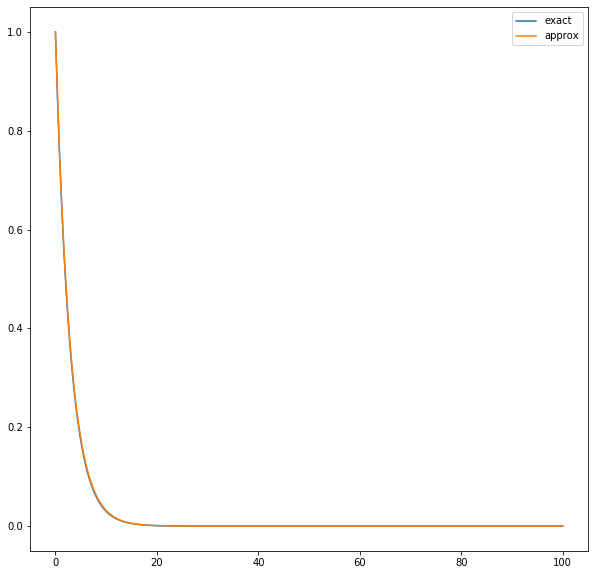

In [138]:
test_implicit_scalar_euler(1, 1000, 100, 0.05, 1e-4)

In [139]:
def test_stability_implicit_scalar_euler(u0, k, T, h, TOL):
    test_model, a = generate_random_linear_model()
    print("Model : du/dt = "+str(a)+"u(t)")
    print("\nu0 = ",u0)
    print("\nNumber of time steps : ", k)
    print("\nInitial time : 0, Final time : ", T)
    plt.figure(figsize=[10,10])
    x = np.linspace(0,T,k+1)
    for u in u0:
        approx = implicit_scalar_euler(test_model, u, k, T, h, TOL)
        plt.plot(x, approx, label='u0 = '+str(u))
    plt.legend()

Model : du/dt = -0.788451353282213u(t)

u0 =  [-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]

Number of time steps :  100

Initial time : 0, Final time :  10


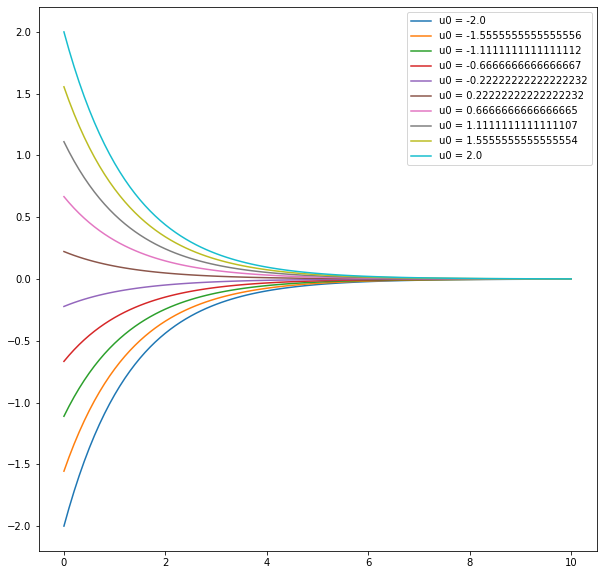

In [141]:
u0 = np.linspace(-2,2,10)
test_stability_implicit_scalar_euler(u0,100,10,0.05, 1e-4)

## Explicit Euler's method on systems of initial value problems

We test the different methods implemented with the predator/prey model presented in the lecture notes.

We can note that, with respect to this particular model, the three different methods give three different results. Using only the explicit method makes the system grow. On the opposite, correcting the approximation done with the explicit method with the implicit method makes the system  slowly converge towards the equilibrium point. Only the explicit method corrected with the trapezoidal method "keeps" the oscillatory property of the solution, even if it's not completely perfect if the number of approximation points is not enough.

In [80]:
def reference_predator_prey_system(u, t):
        return np.array([u[0]*(1-1*u[1]), u[1]*(1.5*u[0]-2)])

In [191]:
def test_reference_system(function, u0, k, T):
    print("\nu0 = ",u0)
    print("\nNumber of time steps : ", k)
    print("\nInitial time : 0, Final time : ", T)
    approx = np.array(function(reference_predator_prey_system, u0, k, T))
    plt.figure(figsize=[6,6])
    x = np.linspace(0,T,k+1)
    print(x.shape)
    print(np.array(approx).shape)
    plt.plot(x, approx[:,0], label='prey')
    plt.plot(x, approx[:,1], label='predator')
    plt.legend()
    
    plt.figure(figsize=[6,6])
    plt.plot(approx[:,0], approx[:,1])
    plt.scatter(2/1.5, 1)


u0 =  [1.1 0.5]

Number of time steps :  10000

Initial time : 0, Final time :  130
(10001,)
(10001, 2)


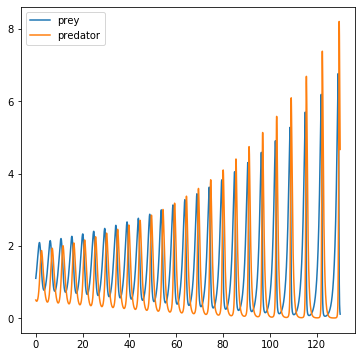

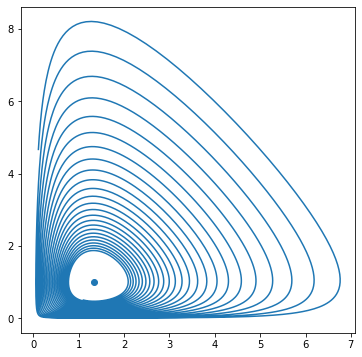

In [195]:
test_reference_system(explicit_system_euler, np.array([1.1,0.5]), 10000, 130)


u0 =  [1.1 0.5]

Number of time steps :  10000

Initial time : 0, Final time :  130
(10001,)
(10001, 2)


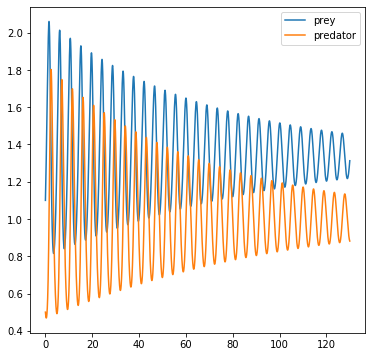

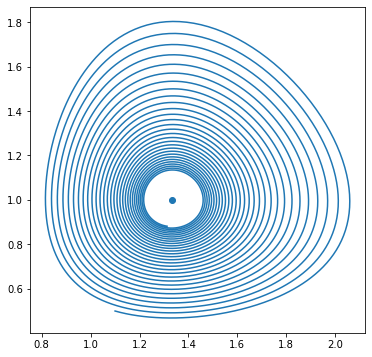

In [194]:
test_reference_system(explicit_system_euler_implicit_corrected, np.array([1.1,0.5]), 10000, 130)


u0 =  [1.1 0.5]

Number of time steps :  1000

Initial time : 0, Final time :  13
(1001,)
(1001, 2)


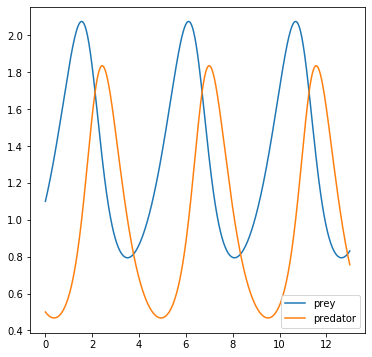

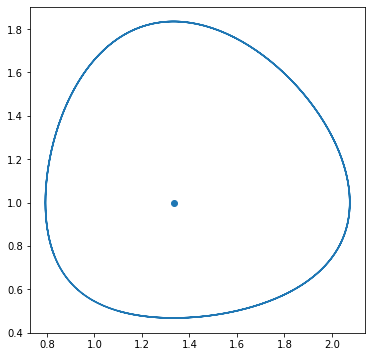

In [198]:
test_reference_system(explicit_system_euler_trapezoidal_corrected, np.array([1.1,0.5]), 1000, 13)


u0 =  [1.1 0.5]

Number of time steps :  1000

Initial time : 0, Final time :  100
(1001,)
(1001, 2)


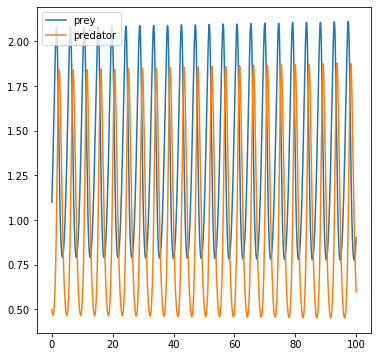

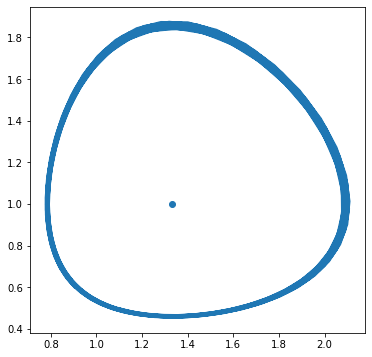

In [197]:
test_reference_system(explicit_system_euler_trapezoidal_corrected, np.array([1.1,0.5]), 1000, 100)

## Simulation of a stochastic differential equation

To verify the correctness of our simulations, we generate multiple trajectories, and compute the mean value at each time t, which should tend to the theoretical expectation $E[X_t]=X_0*exp(mu*t)$.

In [188]:
def test_simulation(X0, k, T, n):
    mu = np.random.rand()*2 - 1
    sigma = np.random.rand()*0.5
    print("Stochastic differential equation : dX_t = "+str(mu)+"*X_t*dt + "+str(sigma)+"*X_t*dW")
    print("\nFinal time : "+str(T))
    print("\nInitial value : "+str(X0))
    print("\nNumber of time steps : "+str(k))
    print("\nNumber of paths : "+str(n))
    
    paths = []
    for i in range(n):
        paths.append(euler_maruyama(X0, mu, sigma, k, T))
    
    exp = np.zeros(len(paths[0]))
    times = np.linspace(0,T,k+1)
    th = [X0*np.exp(mu*t) for t in times]
    
    plt.figure(figsize=[12,12])
    for i in range(n):
        plt.plot(times, paths[i])
        exp += paths[i]
    exp /= n
    
    plt.figure(figsize=[8,8])
    plt.plot(times, exp, label='Mean values')
    plt.plot(times, th, label='Theoretical expectation')
    plt.legend()

Stochastic differential equation : dX_t = -0.7236734792473307*X_t*dt + 0.42052326843338267*X_t*dW

Final time : 10

Initial value : 10

Number of time steps : 2000

Number of paths : 1000


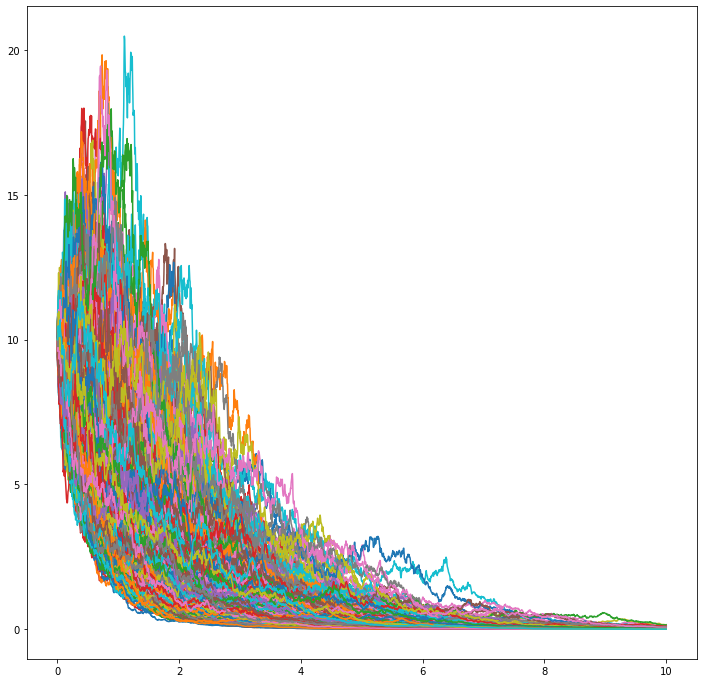

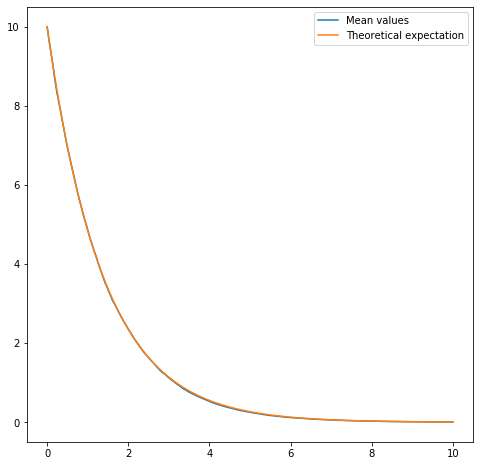

In [201]:
test_simulation(10, 2000, 10, 1000)

# **Discussion**

In the end, we implemented and tested all these methods. The result in the second part is particularly interesting, showing that the choice of method is important to keep some properties of the approximated solution.